In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
manPicks = pd.read_csv(r'/mnt/ufs18/nodr/home/jieyaqi/alaska/manual_pick/manual.csv', delimiter=' ')

In [21]:
manPicks['Date&Time'] = manPicks['Date&Time'].apply(lambda x: pd.Timestamp(x[:-1]))
manPicks = manPicks[manPicks['Date&Time'] >= pd.Timestamp(2019,1,1)]
manPicks = manPicks[manPicks['Date&Time'] <= pd.Timestamp(2019,3,1)]

In [23]:
manPicks['id'] = manPicks.apply(lambda x: f'{x["Network"]}.{x["Station"]}..BH', axis = 1)

In [24]:
manPicks

,Event_ID,Date&Time,Longitude,Latitude,Depth,Magnitude,Network,Station,Channel,Arrival,Phase,TimeResidual,TimeWeight,id
199818,0191qjphy,2019-01-01 05:05:56.545,-161.4584,54.3925,25.6,2.4,XO,LT20,HHZ,9.056,P,-0.014,0.265,XO.LT20..BH
199819,0191qjphy,2019-01-01 05:05:56.545,-161.4584,54.3925,25.6,2.4,XO,LT17,HHZ,14.396,P,0.343,0.265,XO.LT17..BH
199820,0191qjphy,2019-01-01 05:05:56.545,-161.4584,54.3925,25.6,2.4,XO,WS75,HHZ,14.502,P,1.011,0.265,XO.WS75..BH
199821,0191qjphy,2019-01-01 05:05:56.545,-161.4584,54.3925,25.6,2.4,XO,WD69,HHZ,15.034,P,-1.155,0.265,XO.WD69..BH
199822,0191qjphy,2019-01-01 05:05:56.545,-161.4584,54.3925,25.6,2.4,XO,LT20,HH2,16.364,S,0.220,0.106,XO.LT20..BH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251038,0192fyc12b,2019-02-22 18:22:55.074,-162.6932,53.4196,41.2,3.0,XO,WD65,HH1,63.331,S,-1.758,0.225,XO.WD65..BH
251039,0192fyc12b,2019-02-22 18:22:55.074,-162.6932,53.4196,41.2,3.0,AV,S12K,BHE,63.898,S,-1.087,0.090,AV.S12K..BH
251040,0192fyc12b,2019-02-22 18:22:55.074,-162.6932,53.4196,41.2,3.0,XO,LA21,HHZ,66.860,P,-1.551,0.095,XO.LA21..BH
251041,0192fyc12b,2019-02-22 18:22:55.074,-162.6932,53.4196,41.2,3.0,XO,WD64,HH1,75.629,S,-1.548,0.076,XO.WD64..BH


In [25]:
import os
PicksTest = pd.DataFrame()
datadir = '/mnt/scratch/jieyaqi/alaska/test_190102'
for id in set(manPicks['id']):
    net, sta, _, _ = id.split('.')
    if os.path.isdir(os.path.join(datadir, sta)):
        PickSta = manPicks[manPicks['id'] == id]
        PickSta['id'] = f'{net}.{sta}..BH' 
        PicksTest = pd.concat([PicksTest, PickSta])

/tmp/ipykernel_20756/1721544064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PickSta['id'] = f'{net}.{sta}..BH'
/tmp/ipykernel_20756/1721544064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PickSta['id'] = f'{net}.{sta}..BH'
/tmp/ipykernel_20756/1721544064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [30]:
PicksTest['timestamp'] = PicksTest.apply(lambda x: x['Date&Time'] + pd.Timedelta(seconds= x['Arrival']), axis = 1)

In [31]:
PicksTest

,Event_ID,Date&Time,Longitude,Latitude,Depth,Magnitude,Network,Station,Channel,Arrival,Phase,TimeResidual,TimeWeight,id,timestamp
200016,0191r7uq7,2019-01-01 06:18:21.851,-157.9859,57.1614,133.1,3.0,XO,LD41,HHZ,52.857,P,-1.574,0.164,XO.LD41..BH,2019-01-01 06:19:14.708000000
200068,0191r7uq7,2019-01-01 06:18:21.851,-157.9859,57.1614,133.1,3.0,XO,LD41,HH2,94.762,S,-2.260,0.018,XO.LD41..BH,2019-01-01 06:19:56.613000000
200096,0191u5who,2019-01-01 11:12:56.407,-149.1689,55.7353,18.6,3.5,XO,LD41,HHZ,38.250,P,0.220,0.188,XO.LD41..BH,2019-01-01 11:13:34.657000000
200368,0191vi026,2019-01-01 13:37:42.357,-154.0465,56.3329,17.5,3.6,XO,LD41,HHZ,27.031,P,-2.246,0.228,XO.LD41..BH,2019-01-01 13:38:09.388000000
200436,0191vi026,2019-01-01 13:37:42.357,-154.0465,56.3329,17.5,3.6,XO,LD41,HH2,47.652,S,-4.520,0.091,XO.LD41..BH,2019-01-01 13:38:30.009000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249388,0192e8adoq,2019-02-21 14:01:23.620,-151.9062,55.3116,10.1,2.9,XO,LT04,HHZ,24.112,P,-0.013,0.251,XO.LT04..BH,2019-02-21 14:01:47.732000000
249414,0192e8adoq,2019-02-21 14:01:23.620,-151.9062,55.3116,10.1,2.9,XO,LT04,HH2,43.575,S,0.616,0.251,XO.LT04..BH,2019-02-21 14:02:07.195000000
249694,0192fx8xy6,2019-02-22 16:40:18.866,-148.5116,56.3298,2.4,2.9,XO,LT04,HH1,86.593,S,1.165,0.188,XO.LT04..BH,2019-02-22 16:41:45.459000000
249782,0192hdmxxc,2019-02-23 04:39:50.721,-156.4844,57.7899,127.1,1.9,XO,LT04,HH2,59.841,S,1.011,0.221,XO.LT04..BH,2019-02-23 04:40:50.562000000


In [32]:
PicksTest = PicksTest[['id', 'Event_ID', 'timestamp', 'Phase']]

In [34]:
PicksTest.columns = ['id', 'evid', 'timestamp', 'type']

In [36]:
PicksTest.to_csv(r'../data/ManualTest.csv',
                index=False, 
                float_format="%.3f",
                date_format='%Y-%m-%dT%H:%M:%S.%f')

In [37]:
eqt = pd.read_csv('/mnt/scratch/jieyaqi/alaska/eqt/picks.csv')

## Calculate F score based on picks

In [1]:
import pandas as pd
import numpy as np

In [4]:
picks = pd.read_csv(r'../picks_initave_cons.csv')

In [5]:
picks['associate'] = picks.apply(lambda x: f'{x["evid"]}_{x["event_index"]}', axis = 1)

In [6]:
associate = picks['associate'].to_numpy()
unique, counts = np.unique(associate, return_counts=True)

In [7]:
events = pd.read_csv(r'../data/events.csv', delimiter = '\t')
catalogs = pd.read_csv(r'../catalogs_gamma.csv', delimiter = '\t')

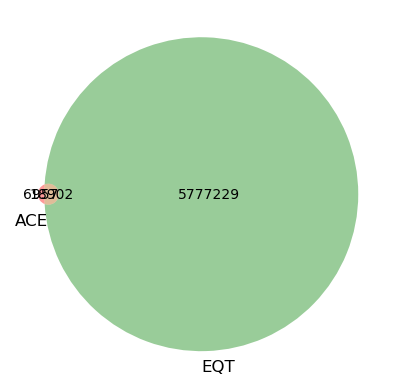

In [32]:
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt

# depict venn diagram
venn2(subsets = (6957, 5777229, 18902), set_labels = ('ACE', 'EQT'))
plt.show()

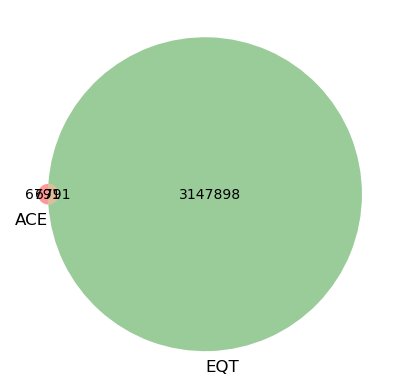

In [26]:
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt

# depict venn diagram
venn2(subsets = (6791, 3147898, 6791), set_labels = ('ACE', 'EQT'))
plt.show()

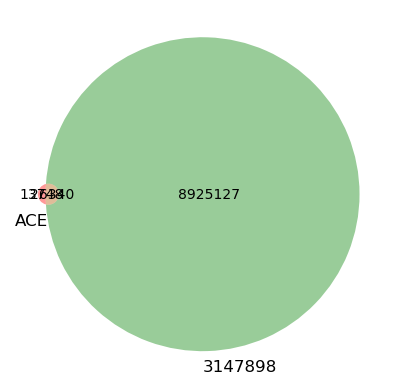

In [28]:
from matplotlib_venn import venn2 
from matplotlib import pyplot as plt

# depict venn diagram
venn2(subsets = (13748, 8925127, 26340), set_labels = ('ACE', '3147898'))
plt.show()

# Generate station file

In [15]:
import pandas as pd
stations = pd.read_csv('/mnt/scratch/jieyaqi/alaska/station.txt', delimiter='|')
stations['id'] = stations.apply(lambda x: f'{x["#Network"]}.{x["Station"]}..BH', axis=1)
stations = stations[["id", "Longitude",	"Latitude",	"Elevation"]]
stations.columns = ["id", "longitude", "latitude", "elevation(m)"]
stations.to_csv(r'../data/stations.csv', index=False)

# Calculate Fscore for Association

In [66]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [96]:
gamma_picks = pd.read_csv(r'../picks_init0_1d.csv', delimiter=',')
event_id_pool=set(gamma_picks.evid)
event_index_pool=set(gamma_picks.event_index)
event_index = event_index_pool.difference([-1])

counter=defaultdict(int)
def count_func(row):
    if row.event_index!=-1:
        counter[(row.evid,row.event_index)]+=1

gamma_picks.apply(count_func,axis=1)
status=[]
for key in counter:
    status.append([counter[key],key[0],key[1]])
status.sort(reverse=True)

mapper={}
for _,evid,event_index in status:
    if evid in event_id_pool and event_index in event_index_pool:
        mapper[evid]=event_index
        event_id_pool.remove(evid)
        event_index_pool.remove(event_index)

In [97]:
# F1score for picks 
# tp: row in gamma_picks satisfy mapper
# fp: row in gamma_picks not satisfy mapper
# fn: event_index is -1
tp,fp,fn=[0],[0],[0]
def count_confusion(row):
    if row.event_index==-1:
        fn[0]+=1
    elif row.evid in mapper and mapper[row.evid]==row.event_index:
        tp[0]+=1
    else:
        fp[0]+=1
gamma_picks.apply(count_confusion,axis=1);

precision=tp[0]/(tp[0]+fp[0])
recall=tp[0]/(tp[0]+fn[0])
f1=2*precision*recall/(precision+recall)
print("precision: ",precision)
print("recall: ",recall)
print("f1: ",f1)

print("tp: ",tp[0])
print("fp: ",fp[0])
print("fn: ",fn[0])

precision:  0.9828794834884969
recall:  0.9908777614307059
f1:  0.9868624167052703
tp:  346179
fp:  6030
fn:  3187


In [98]:
# F1score for events
# tp: events satisfy mapper
# fp: events left in event_index_pool
# fn: events left in event_id_pool
tp = len(mapper)
fp = len(event_index_pool)
fn = len(event_id_pool)

precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=2*precision*recall/(precision+recall)
print("precision: ",precision)
print("recall: ",recall)
print("f1: ",f1)

print("tp: ",tp)
print("fp: ",fp)
print("fn: ",fn)

precision:  0.9757301522007404
recall:  0.9826014913007457
f1:  0.9791537667698659
tp:  7116
fp:  177
fn:  126


# Plot location difference

In [99]:
catalogs = pd.read_csv(r'../catalogs_init0_1d.csv', delimiter=',')
events = pd.read_csv(r'../data/events.csv', delimiter='\t')

In [100]:
def findtp(row):
    if row.evid in mapper.keys():
        return mapper[row.evid]
    else:
        return pd.NA
events['event_index'] = events.apply(findtp, axis=1)
catalogs['event_index'] = catalogs.index
catalogs['event_index'] = catalogs['event_index'].astype(object)
event_incommon = events.merge(catalogs, how='inner', on='event_index')

Text(0.5, 1.0, 'Depth_GaMMA')

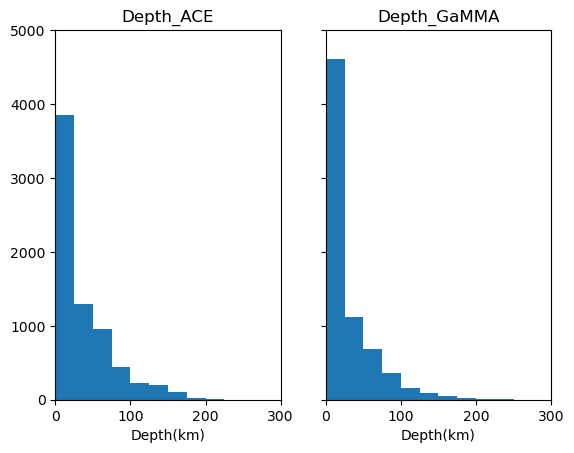

In [101]:
# Plot depth distribution
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.hist(event_incommon['depth'], bins=range(0, 325, 25))
plt.xlim(0,300)
plt.ylim(0,5000)
plt.xlabel('Depth(km)')
plt.title('Depth_ACE')
plt.subplot(1,2,2)
plt.hist(event_incommon['depth(m)']/1000, bins=range(0, 325, 25))
plt.xlim(0,300)
plt.ylim(0,5000)
plt.xlabel('Depth(km)')
plt.tick_params(labelleft=False)
plt.title('Depth_GaMMA')

Text(0.5, 0, 'Distance(km)')

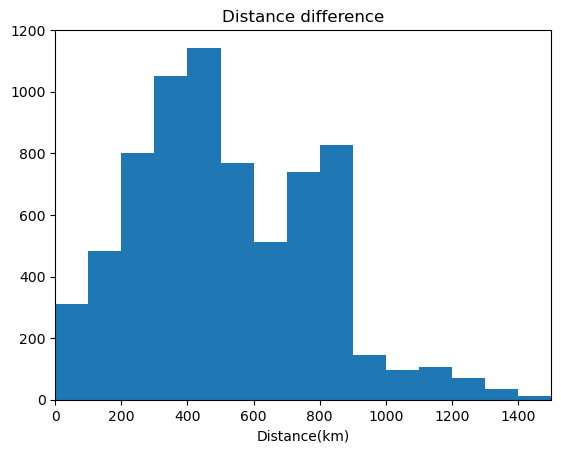

In [95]:
# Plot depth distribution
event_incommon['distance_diff'] = event_incommon.apply(lambda x: np.linalg.norm([(x["longitude_x"]-x["longitude_y"])*100, (x["latitude_x"]-x["latitude_y"])*100, x["depth"]-x["depth(m)"]/1000]), axis=1)

plt.hist(event_incommon['distance_diff'], bins=range(0,1600,100))
plt.xlim(0,1500)
plt.ylim(0,1200)
plt.title('Distance difference')
plt.xlabel('Distance(km)')

# Plot gamma move-out map

In [14]:
import pandas as pd
from pyproj import Proj
from obspy import UTCDateTime
import numpy as np
from gamma.utils import association

picks = pd.read_csv(r'../picks_gamma.csv', delimiter = '\t')
picks['timestamp'] = picks['timestamp'].apply(lambda x: pd.Timestamp(x))
event_syn = pd.read_csv(r'../data/events.csv', delimiter='\t')
catalogs = pd.read_csv(r'../catalogs_gamma.csv', delimiter = '\t')

pickst = picks

In [66]:
for k,v in mapper.items():
    if v == 7141:
        print(k)

0192mim8as


(0.0, 131.7)

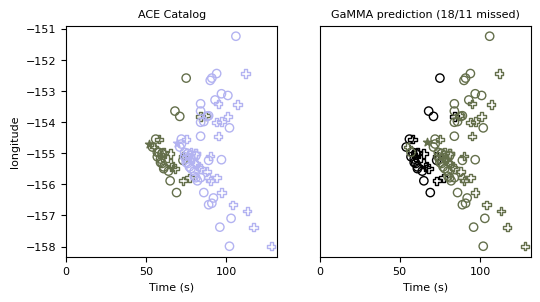

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
# t0 = pd.Timestamp(2019, 7, 7, 4, 50)
# t1 = pd.Timestamp(2019, 7, 5, 5, 40)
t0 = pd.Timestamp(2018, 12, 29, 21, 45)
t1 = pd.Timestamp(2018, 12, 29, 21, 50)
picks_syn = pickst[(pickst["timestamp"] >= t0)]
picks_syn = picks_syn[(picks_syn["timestamp"] < t1)]
picks_syn['timediff'] = picks_syn['timestamp'].apply(lambda x: x - t0)
picks_syn = picks_syn.astype({'timediff':'timedelta64[s]'})
catalogs['timestamp'] = catalogs['time'].apply(lambda x: pd.Timestamp(x))
catalogs['timediff'] = catalogs['timestamp'].apply(lambda x: x - t0)
catalogs = catalogs.astype({'timediff':'timedelta64[s]'})
event_syn['timestamp'] = event_syn['time'].apply(lambda x: pd.Timestamp(x[:-1]))
event_syn['timediff'] = event_syn['timestamp'].apply(lambda x: x - t0)
event_syn = event_syn.astype({'timediff':'timedelta64[s]'})

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
color = ['#646F4B', '#b3b3f1', '#b4654a', 'c', 'm', 'blue', 'orange', 'yellow', 'green', 'red', 'purple', 'pink', 'darkblue', 'gray', 'lightpink', 'darkblue', 'lightgray']
p = picks_syn[picks_syn['type']=='P']
s = picks_syn[picks_syn['type']=='S']
for idx, eid in enumerate(sorted(set(picks_syn['evid']))):
    plt.scatter(p[p['evid'] == eid]["timediff"], p[p['evid'] == eid]["longitude"], marker = 'o', edgecolors = color[idx], facecolors = 'none')
    plt.scatter(s[s['evid'] == eid]["timediff"], s[s['evid'] == eid]["longitude"], marker = 'P', edgecolors = color[idx], facecolors = 'none')
    plt.scatter(event_syn[event_syn['evid'] == eid]['timediff'], event_syn[event_syn['evid'] == eid]['longitude'], marker = '*', edgecolors = color[idx], facecolors = color[idx])
plt.xlim(left = 0)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel('Time (s)', fontsize = 8)
plt.ylabel('longitude', fontsize = 8)
plt.title('ACE Catalog', fontsize = 8)

plt.subplot(1,2,2)
plt.scatter(p[p['event_index'] == -1]["timediff"], p[p['event_index'] == -1]["longitude"], marker = 'o', edgecolors = 'k', facecolors = 'none')
plt.scatter(s[s['event_index'] == -1]["timediff"], s[s['event_index'] == -1]["longitude"], marker = 'P', edgecolors = 'k', facecolors = 'none')
for idx, eid in enumerate(sorted(set(picks_syn['event_index']).difference([-1]))):
    plt.scatter(p[p['event_index'] == eid]["timediff"], p[p['event_index'] == eid]["longitude"], marker = 'o', edgecolors = color[idx], facecolors = 'none')
    plt.scatter(s[s['event_index'] == eid]["timediff"], s[s['event_index'] == eid]["longitude"], marker = 'P', edgecolors = color[idx], facecolors = 'none')
    plt.scatter(catalogs[catalogs['event_index'] == eid]['timediff'], catalogs[catalogs['event_index'] == eid]['longitude'], marker = '*', edgecolors = color[idx], facecolors = color[idx])
# plt.xlim(left = 0, right = 300)
plt.yticks([])
plt.xticks(fontsize = 8)
plt.xlabel('Time (s)', fontsize = 8)
pmiss = len(p[p['event_index'] == -1])
smiss = len(s[s['event_index'] == -1])
plt.title(f'GaMMA prediction ({pmiss}/{smiss} missed)', fontsize = 8)
plt.xlim(left = 0)
# plt.savefig('example10.pdf', format = 'pdf', bbox_inches = "tight")

In [40]:
!awk '$7==6990{print $0}' ../picks_gamma.csv

0195qzrkqh	AK.Q19K..BH	2019-05-05T16:11:25.797000	S	Q19K	1.0	6990.0	0.0480018610532	-153.6446	58.9287	631.0	135.795085967	440.009194726	-0.631
0195qzrkqh	XO.LT12..BH	2019-05-05T16:11:52.519000	P	LT12	1.0	6990.0	0.0620588890695	-157.778	55.207	-83.0	-113.186163227	24.484915156	0.083
0195qzrkqh	XO.LT10..BH	2019-05-05T16:11:46.486000	P	LT10	1.0	6990.0	0.0468141453646	-157.3251	55.6251	-98.0	-83.4738587928	70.3863706724	0.098
0195qzrkqh	TA.O14K..BH	2019-05-05T16:11:47.360000	P	O14K	1.0	6990.0	0.0757802622324	-161.2638	59.2533	129.0	-300.490059936	485.482024761	-0.129
0195qzrkqh	XO.LD36..BH	2019-05-05T16:11:47.712000	P	LD36	1.0	6990.0	0.0633041009977	-155.7525	55.2524	-935.0	15.7390186676	28.1265794721	0.935
0195qzrkqh	XO.LA25..BH	2019-05-05T16:11:51.562000	P	LA25	1.0	6990.0	0.0666105387415	-155.9408	54.8901	-2622.0	3.79880350135	-12.2327419116	2.622
0195qzrkqh	XO.LA28..BH	2019-05-05T16:11:53.029000	P	LA28	1.0	6990.0	0.0685550766825	-156.603	54.8983	-1852.0	-38.6856721537	-11.1548576055	1.8

In [55]:
picks[picks['evid']=='018goouu9m']

,evid,id,timestamp,type,station,prob,event_index,gamma_score,longitude,latitude,elevation(m),x(km),y(km),z(km)
4928,018goouu9m,II.KDAK..BH,2018-12-29 21:46:15.299000,P,KDAK,1.0,-1.0,-1.000000,-152.58350,57.782800,152.0,203.303737,314.973536,-0.1520
39418,018goouu9m,AK.Q19K..BH,2018-12-29 21:46:08.380000,P,Q19K,1.0,-1.0,-1.000000,-153.64460,58.928700,631.0,135.795086,440.009195,-0.6310
51413,018goouu9m,TA.Q17K..BH,2018-12-29 21:46:05.593000,P,Q17K,1.0,-1.0,-1.000000,-155.88650,58.263700,1165.0,6.667561,363.526872,-1.1650
51414,018goouu9m,TA.Q17K..BH,2018-12-29 21:46:13.879000,S,Q17K,1.0,-1.0,-1.000000,-155.88650,58.263700,1165.0,6.667561,363.526872,-1.1650
55685,018goouu9m,TA.P18K..BH,2018-12-29 21:46:13.549000,P,P18K,1.0,-1.0,-1.000000,-155.22920,59.392200,680.0,43.860638,489.616632,-0.6800
63565,018goouu9m,AV.ANCK..BH,2018-12-29 21:46:01.897000,P,ANCK,1.0,-1.0,-1.000000,-155.49550,58.198743,865.0,29.689926,356.389757,-0.8650
63566,018goouu9m,AV.ANCK..BH,2018-12-29 21:46:08.335000,S,ANCK,1.0,-1.0,-1.000000,-155.49550,58.198743,865.0,29.689926,356.389757,-0.8650
68254,018goouu9m,AV.ACH..BH,2018-12-29 21:46:00.229000,P,ACH,1.0,-1.0,-1.000000,-155.32810,58.210000,960.0,39.528944,357.728974,-0.9600
68255,018goouu9m,AV.ACH..BH,2018-12-29 21:46:05.418000,S,ACH,1.0,-1.0,-1.000000,-155.32810,58.210000,960.0,39.528944,357.728974,-0.9600
70812,018goouu9m,AV.KCE..BH,2018-12-29 21:45:59.053000,P,KCE,1.0,-1.0,-1.000000,-155.18540,58.242600,777.0,47.880773,361.453649,-0.7770
